In [1]:
import sys
sys.path.append("/home/qrr2/project/")
sys.path.append("/home/qrr2/project/QOGS/")
import math
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.interpolate import interp1d
from scipy.spatial import distance
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Fock 1

### Measured Point

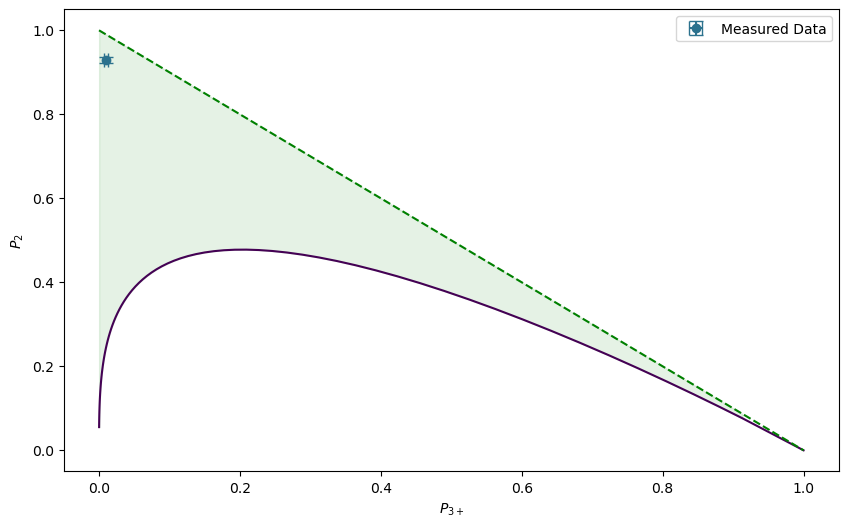

In [2]:
P_1 = 0.9293535838
P_1_std = 0.0061570871
P_2_plus = 0.0098423598
P_2_plus_std = 0.0029739268

data = [
    (1, 0), (0.9133053027167384, 0.07623582707450144), (0.8806563084024621, 0.10353159365717009),
    (0.8444165029518013, 0.1331081152836394), (0.8056065525341368, 0.1639646575329956),
    (0.7651714102132097, 0.19521203062960565), (0.7239364788409324, 0.22610506803199773),
    (0.6825922634052046, 0.2560486163608516), (0.6416962079453721, 0.28458844390235843),
    (0.6016837986484949, 0.31139477183159847), (0.5628838211193001, 0.33624321452361533),
    (0.5255346914345266, 0.35899587565053537), (0.4898001416321279, 0.379584022822339),
    (0.45578340281363816, 0.3979929526389008), (0.42353954930991283, 0.4142491892251004),
    (0.3930859643962709, 0.42840990748498525), (0.36441104510191186, 0.4405543524021967),
    (0.3374813360909956, 0.4507769826205361), (0.31224730591125543, 0.4591820657862537),
    (0.2886479752466294, 0.46587947382611666), (0.26661458959580076, 0.47098145622288023),
    (0.24607350591820049, 0.47460020154770705), (0.22694843869379827, 0.47684602838190965),
    (0.20916218789189478, 0.4778260745896208), (0.19263795065387895, 0.4776433780642166),
    (0.17730030046750522, 0.47639626253552037), (0.1630759022546875, 0.47417795906250004),
    (0.14989401892001153, 0.47107640784624216), (0.13768685423456728, 0.4671741964125903),
    (0.12638976815687425, 0.46254859944823074), (0.11594139352722199, 0.45727169300316106),
    (0.10628367724797438, 0.4514105217221942), (0.09736186434735339, 0.44502730251490563),
    (0.08912443951894067, 0.4381796518475852), (0.0815230376661123, 0.4309208268322529),
    (0.07451233252081851, 0.42329997265160063), (0.06804991043485459, 0.4153623707206822),
    (0.06209613486529375, 0.4071496834477798), (0.0566140058175757, 0.39870019259985423),
    (0.05156901750785137, 0.3900490291678057), (0.04692901671032579, 0.38122839331586966),
    (0.042664063624913484, 0.3722677635297138), (0.038746296602809205, 0.36319409448256573),
    (0.03514980167614923, 0.35403200344461694), (0.03185048753159364, 0.34480394528915054),
    (0.02882596632928419, 0.33553037631617816), (0.026055440584488276, 0.32622990723418477),
    (0.02351959618829641, 0.31691944572347536), (0.021200501537115002, 0.3076143290589732),
    (0.019081512661296984, 0.29832844730277297), (0.01714718418533706, 0.2890743575925479),
    (0.015383185911076624, 0.2798633900551564), (0.013776224787650893, 0.27070574586874646),
    (0.012313972014503238, 0.2616105879838455), (0.010984995014403032, 0.25258612499632155),
    (0.009778694010107308, 0.2436396886442618), (0.008685242939668436, 0.2347778053778996),
    (0.007695534450181313, 0.22600626242766245), (0.006801128717111027, 0.21733016877087297),
    (0.005994205845432837, 0.20875401137315622), (0.005267521619157695, 0.20028170705654544),
    (0.00461436637688159, 0.1919166503229203), (0.004028526802495547, 0.18366175743894975),
    (0.0035042504318236467, 0.17551950706726308), (0.003036212687520773, 0.1674919777082222),
    (0.0026194862659291163, 0.15958088219745137), (0.0022495127106271218, 0.1517875994862129),
    (0.0019220760180360674, 0.1441132039147791), (0.0016332781306346023, 0.1365584921731288),
    (0.0013795161830311986, 0.129124008128541), (0.0011574613753237012, 0.1218100656859361),
    (0.000964039356865537, 0.1146167698340653), (0.000796412011718789, 0.10754403601882964),
    (0.0006519605447518756, 0.10059160797406135), (0.0005282697745229575, 0.09375907412996971),
    (0.00042311354581106575, 0.08704588271008903), (0.00033444118092137987, 0.08045135561891872),
    (0.00026036489475730895, 0.07397470121445818), (0.00019914810406385097, 0.06761502605247538),
    (0.0001491945663474603, 0.061371345682552175), (0.00010903828864593235, 0.05524259456968807)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_2_plus, P_1, xerr=P_2_plus_std, yerr=P_1_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{3+}$')
plt.ylabel(r'$P_{2}$')
plt.title("")
plt.legend()
plt.show()

### Trajectory Which Finds the Closest Distance Reached

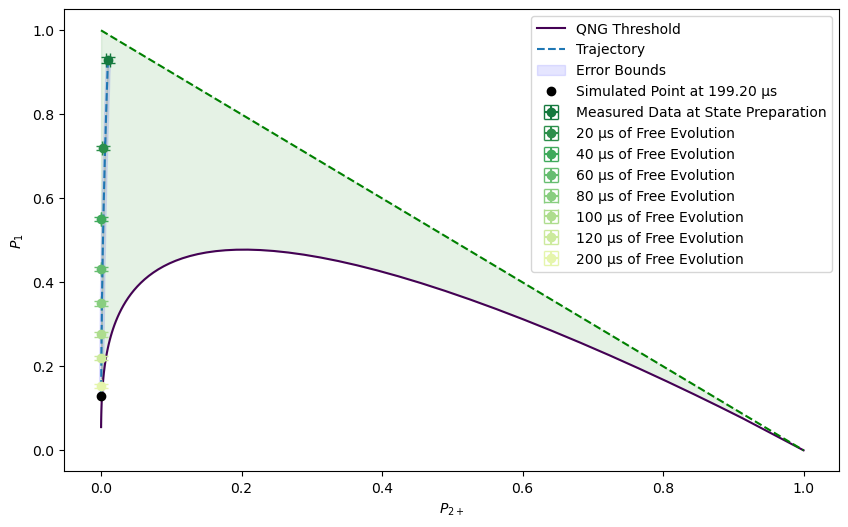

In [3]:
N_dim = 10
T1 = 100
T2 = 60
a = qt.destroy(N_dim)

# Given population
populations = [0.0608040564, 0.9293535838, 0.0098423598]
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, N_dim - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Relaxation
c_ops = [np.sqrt(1/T1) * a]

# Hamiltonian
H = a.dag() * a * 0

# Time array (in microseconds)
times = np.linspace(0, 200, 2000)

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)

# Extract the populations of Fock states 1 and 2+ over time
populations_1 = np.array([qt.expect(qt.fock_dm(N_dim, 1), state) for state in result.states])
populations_2_plus = np.array([qt.expect(qt.fock_dm(N_dim, 2), state) for state in result.states])

# Calculate the standard deviation boundaries for the trajectory
populations_1_upper = populations_1 + P_1_std
populations_1_lower = populations_1 - P_1_std
populations_2_plus_upper = populations_2_plus + P_2_plus_std
populations_2_plus_lower = populations_2_plus - P_2_plus_std

# Create interpolation functions for the curve
interp_curve_y = interp1d(curve_x, curve_y, kind='cubic')

plt.figure(figsize=(10, 6))
plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF', label='QNG Threshold')
cmap = plt.get_cmap('YlGn')
colors = cmap(np.linspace(0.2, 0.8, 8))
plt.errorbar(P_2_plus, P_1, xerr=P_2_plus_std, yerr=P_1_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
plt.errorbar(0.0032786267, 0.7194896467, xerr=0.0013145061, yerr=0.0055626645, fmt='o', color=colors[6], capsize=5, label='20 μs of Free Evolution')
plt.errorbar(0, 0.5505050418, xerr=0, yerr=0.0050888941, fmt='o', color=colors[5], capsize=5, label='40 μs of Free Evolution')
plt.errorbar(0, 0.4315189820, xerr=0, yerr=0.0050564029, fmt='o', color=colors[4], capsize=5, label='60 μs of Free Evolution')
plt.errorbar(0, 0.3497179489, xerr=0, yerr=0.0055295536, fmt='o', color=colors[3], capsize=5, label='80 μs of Free Evolution')
plt.errorbar(0, 0.2760915850, xerr=0, yerr=0.0051301414, fmt='o', color=colors[2], capsize=5, label='100 μs of Free Evolution')
plt.errorbar(0, 0.2197503182, xerr=0, yerr=0.0046849713, fmt='o', color=colors[1], capsize=5, label='120 μs of Free Evolution')
plt.errorbar(0, 0.1523683240, xerr=0, yerr=0.0049823449, fmt='o', color=colors[0], capsize=5, label='200 μs of Free Evolution')

# Plotting the trajectory with error bounds
plt.plot(populations_2_plus, populations_1, '--', label='Trajectory')
plt.fill_betweenx(populations_1, populations_2_plus_lower, populations_2_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
plt.fill_between(populations_2_plus, populations_1_lower, populations_1_upper, color='gray', alpha=0.3)

# Find the closest point on the trajectory to the curve
min_distance = float('inf')
closest_P1 = None
closest_P2 = None
closest_time = None
for t, p1, p2 in zip(times, populations_1, populations_2_plus):
    distances = distance.cdist([(p2, p1)], list(zip(curve_x, curve_y)))
    min_dist_idx = np.argmin(distances)
    if distances[0, min_dist_idx] < min_distance:
        min_distance = distances[0, min_dist_idx]
        closest_P1 = p1
        closest_P2 = p2
        closest_time = t

plt.plot(closest_P2, closest_P1, 'ko', label=f'Simulated Point at {closest_time:.2f} µs')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{2+}$')
plt.ylabel(r'$P_{1}$')
plt.legend()
plt.title("")
plt.show()

### Trajectory Which Finds the First Interaction

In [4]:
# Find the first intersection of the trajectory with the interpolated curve
first_intersection_time = None
first_intersection_P1 = None
first_intersection_P2 = None
first_intersection_state = None

for t, p1, p2, state in zip(times, populations_1, populations_2_plus, result.states):
    if p2 >= curve_x[0] and p2 <= curve_x[-1]:  # Ensure p2 is within the interpolation range
        curve_y_at_p2 = interp_curve_y(p2)
        print(f"Time: {t:.2f} µs, P1: {p1:.6f}, P2: {p2:.6f}, Curve_y_at_P2: {curve_y_at_p2:.6f}")
        if np.isclose(p1, curve_y_at_p2, atol=0.01):
            first_intersection_time = t
            first_intersection_P1 = p1
            first_intersection_P2 = p2
            first_intersection_state = state
            break

if first_intersection_time is not None:
    # Simulate the intermediate points for the trajectory
    trajectory_times = np.linspace(0, first_intersection_time, 500)
    trajectory_result = qt.mesolve(H, initial_state, trajectory_times, c_ops)
    trajectory_populations_1 = np.array([qt.expect(qt.fock_dm(N_dim, 1), state) for state in trajectory_result.states])
    trajectory_populations_2_plus = np.array([qt.expect(qt.fock_dm(N_dim, 2), state) for state in trajectory_result.states])

    # Calculate the standard deviation boundaries for the trajectory
    trajectory_populations_1_upper = trajectory_populations_1 + P_1_std
    trajectory_populations_1_lower = trajectory_populations_1 - P_1_std
    trajectory_populations_2_plus_upper = trajectory_populations_2_plus + P_2_plus_std
    trajectory_populations_2_plus_lower = trajectory_populations_2_plus - P_2_plus_std

    plt.figure(figsize=(10, 6))
    plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
    cmap = plt.get_cmap('YlGn')
    colors = cmap(np.linspace(0.2, 0.8, 8))
    plt.errorbar(P_2_plus, P_1, xerr=P_2_plus_std, yerr=P_1_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
    plt.errorbar(0.0032786267, 0.7194896467, xerr=0.0013145061, yerr=0.0055626645, fmt='o', color=colors[6], capsize=5, label='20 μs of Free Evolution')
    plt.errorbar(0, 0.5505050418, xerr=0, yerr=0.0050888941, fmt='o', color=colors[5], capsize=5, label='40 μs of Free Evolution')
    plt.errorbar(0, 0.4315189820, xerr=0, yerr=0.0050564029, fmt='o', color=colors[4], capsize=5, label='60 μs of Free Evolution')
    plt.errorbar(0, 0.3497179489, xerr=0, yerr=0.0055295536, fmt='o', color=colors[3], capsize=5, label='80 μs of Free Evolution')
    plt.errorbar(0, 0.2760915850, xerr=0, yerr=0.0051301414, fmt='o', color=colors[2], capsize=5, label='100 μs of Free Evolution')
    plt.errorbar(0, 0.2197503182, xerr=0, yerr=0.0046849713, fmt='o', color=colors[1], capsize=5, label='120 μs of Free Evolution')
    plt.errorbar(0, 0.1523683240, xerr=0, yerr=0.0049823449, fmt='o', color=colors[1], capsize=5, label='200 μs of Free Evolution')
    plt.plot(first_intersection_P2, first_intersection_P1, 'ko', label=f'Simulated Point at {first_intersection_time:.2f} µs')
    plt.plot(trajectory_populations_2_plus, trajectory_populations_1, '--', label='Trajectory')
    plt.fill_betweenx(trajectory_populations_1, trajectory_populations_2_plus_lower, trajectory_populations_2_plus_upper, color='gray', alpha=0.3, label='Error bounds')
    plt.fill_between(trajectory_populations_2_plus, trajectory_populations_1_lower, trajectory_populations_1_upper, color='gray', alpha=0.3)
    plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
    plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
    plt.xlabel(r'$P_{2+}$')
    plt.ylabel(r'$P_{1}$')
    plt.legend()
    plt.title("")
    plt.show()
else:
    print("No point on the curve was reached within the given time range.")

No point on the curve was reached within the given time range.


# Fock 2

### Measured Point

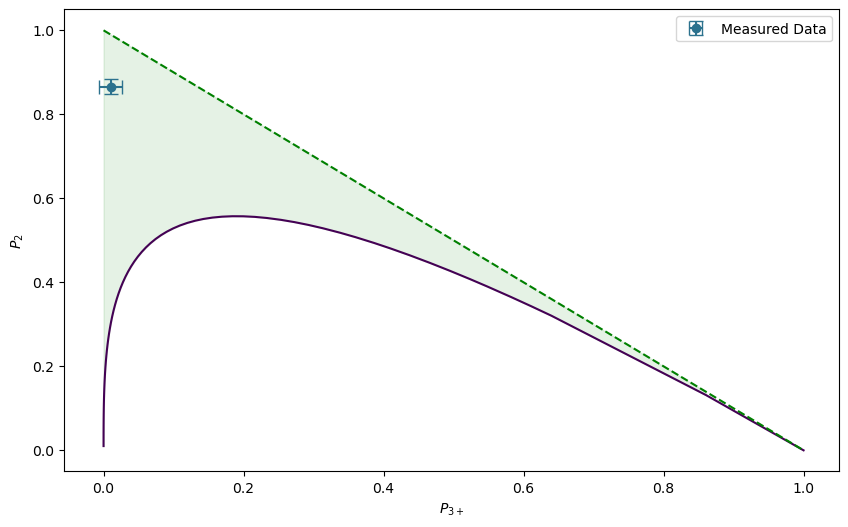

In [5]:
P_2 = 0.8662103471
P_2_std = 0.0182991937
P_3_plus = 0.0099486900
P_3_plus_std = 0.0164058776

data = [
    (3.4297266526817083e-7, 0.01009986027461387), (2.8266443586888457e-6, 0.02041761307807573),
    (9.826175207061638e-6, 0.030945347774686438), (0.000023987736190611564, 0.04167865983018618),
    (0.000048246690321773755, 0.05261351715348522), (0.00008575859172377243, 0.06373337196055626),
    (0.00014026678929668357, 0.0750854323864456), (0.000215641657507315, 0.08663274636491443),
    (0.0003161970302398842, 0.09836964349877629), (0.0004466453449626373, 0.11028980645490061),
    (0.0006116320031500644, 0.12236100568660113), (0.0008177713025190325, 0.13465616256525167),
    (0.0010706730627388916, 0.14711686456732026), (0.001376923081032988, 0.15973367523539128),
    (0.0017436324858651764, 0.17249616345267746), (0.0021778234942798624, 0.18539757292648082),
    (0.002689571862997786, 0.19845641242617748), (0.0032868271418432515, 0.2116287278413861),
    (0.003978585119347233, 0.2248951426480552), (0.004777260943149786, 0.2382918180839877),
    (0.00569254157383392, 0.25175877310884165), (0.006736081884561651, 0.26527705609874297),
    (0.007923565199752902, 0.27888376801709347), (0.009264639783072237, 0.2924957444628548),
    (0.010774242089980235, 0.3060982192381256), (0.012477265461365628, 0.31976615032728806),
    (0.014374633137073656, 0.3333322989246732), (0.01650488530185712, 0.34691692830231624),
    (0.018860227681595454, 0.3603432633760194), (0.021468633753443878, 0.3736249817224008),
    (0.024387220247274355, 0.38691407648201004), (0.027572190464863477, 0.3998701376447006),
    (0.03112964841860244, 0.4127936323702103), (0.03498065361201663, 0.425280076923143),
    (0.039279036810392465, 0.43769476058751766), (0.04389215583392714, 0.44955032081973334),
    (0.04904275086339904, 0.46129309829317444), (0.054518699760954026, 0.47233971839461714),
    (0.06064043023657717, 0.48322767729840144), (0.06708128281187042, 0.4932725159541088),
    (0.07429771012626185, 0.5031043514309289), (0.08212947489601308, 0.5123178346069566),
    (0.09023634707272532, 0.5205035078619819), (0.09935386329265217, 0.5283295632956397),
    (0.10919156451719048, 0.5353617224332266), (0.1197856796160176, 0.5415378192326893),
    (0.13117081253357232, 0.546794631305736), (0.14256922343160616, 0.5508259258241595),
    (0.1555090715573093, 0.5541142896096936), (0.1693086855186159, 0.5563097941160683),
    (0.18398465075483106, 0.5573584192882209), (0.1995462214986118, 0.5572118117673132),
    (0.2159939932375624, 0.5558291720696392), (0.23331868012641843, 0.5531792043652729),
    (0.2534869688029493, 0.5487525800173558), (0.2727231037907284, 0.5433444126204813),
    (0.29275165851614726, 0.5366311633704338), (0.3135147180601987, 0.5286372023967344),
    (0.33790925378870895, 0.5180636279979894), (0.3601813223116942, 0.5074049825876892),
    (0.38644216626998784, 0.4937552622169918), (0.40985860300502475, 0.48068654939547295),
    (0.43755646416478444, 0.46426384798998943), (0.4658967709521964, 0.4464770268524867),
    (0.4947141853593411, 0.4274734778414902), (0.5238322901220751, 0.40742191855499754),
    (0.548314375152233, 0.38995335362961214), (0.5822502595957206, 0.36491760089951214),
    (0.611201684392682, 0.34284941292279947), (0.6397668837896084, 0.3204896891538756), 
    (0.8605830453488519, 0.13156445619422358), (1, 0)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_3_plus, P_2, xerr=P_3_plus_std, yerr=P_2_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{3+}$')
plt.ylabel(r'$P_{2}$')
plt.title("")
plt.legend()
plt.show()

### Trajectory Which Finds the Closest Distance Reached

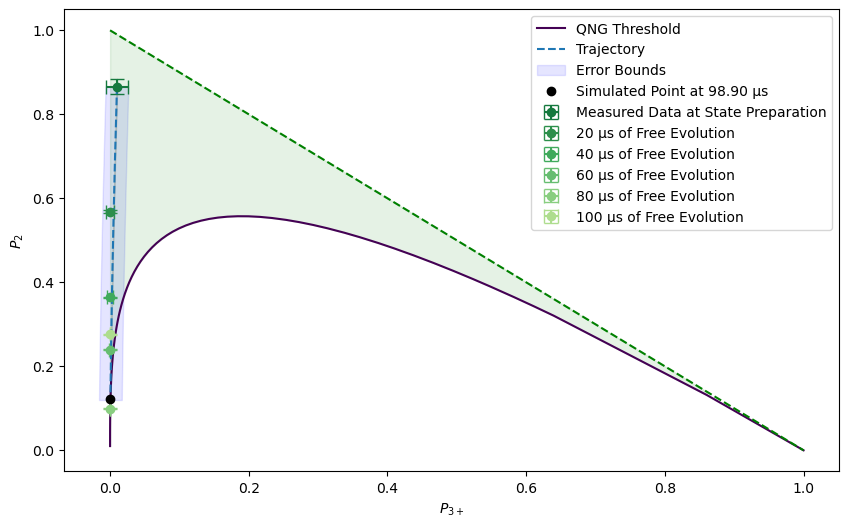

In [6]:
N_dim = 10
T1 = 100
T2 = 60
a = qt.destroy(N_dim)

# Given population
populations = [0.0518728180, 0.0719681449, 0.8662103471, 0.0099486900]
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, N_dim - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Relaxation
c_ops = [np.sqrt(1/T1) * a]

# Hamiltonian
H = a.dag() * a * 0

# Time array (in microseconds)
times = np.linspace(0, 100, 1000)

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)

# Extract the populations of Fock states 2 and 3+ over time
populations_2 = np.array([qt.expect(qt.fock_dm(N_dim, 2), state) for state in result.states])
populations_3_plus = np.array([qt.expect(qt.fock_dm(N_dim, 3), state) for state in result.states])

# Calculate the standard deviation boundaries for the trajectory
populations_2_upper = populations_2 + P_2_std
populations_2_lower = populations_2 - P_2_std
populations_3_plus_upper = populations_3_plus + P_3_plus_std
populations_3_plus_lower = populations_3_plus - P_3_plus_std

# Create interpolation functions for the curve
interp_curve_y = interp1d(curve_x, curve_y, kind='cubic')

plt.figure(figsize=(10, 6))
plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF', label='QNG Threshold')
cmap = plt.get_cmap('YlGn')
colors = cmap(np.linspace(0.2, 0.8, 8))
plt.errorbar(P_3_plus, P_2, xerr=P_3_plus_std, yerr=P_2_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
plt.errorbar(0, 0.5680484069, xerr=0.0063889518, yerr=0.0038008006, fmt='o', color=colors[6], capsize=5, label='20 μs of Free Evolution')
plt.errorbar(0, 0.3640148218, xerr=0.0043575151, yerr=0.0021142198, fmt='o', color=colors[5], capsize=5, label='40 μs of Free Evolution')
plt.errorbar(0, 0.2397277125, xerr=0.0018245901, yerr=0.0012858493, fmt='o', color=colors[4], capsize=5, label='60 μs of Free Evolution')
plt.errorbar(0, 0.0993814694, xerr=0.0005064278, yerr=0.0008757672, fmt='o', color=colors[3], capsize=5, label='80 μs of Free Evolution')
plt.errorbar(0, 0.2760915850, xerr=0, yerr=0.0007424157, fmt='o', color=colors[2], capsize=5, label='100 μs of Free Evolution')

# Plotting the trajectory with error bounds
plt.plot(populations_3_plus, populations_2, '--', label='Trajectory')
plt.fill_betweenx(populations_2, populations_3_plus_lower, populations_3_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
plt.fill_between(populations_3_plus, populations_2_lower, populations_2_upper, color='gray', alpha=0.3)

# Find the closest point on the trajectory to the curve
min_distance = float('inf')
closest_P2 = None
closest_P3 = None
closest_time = None
for t, p2, p3 in zip(times, populations_2, populations_3_plus):
    distances = distance.cdist([(p3, p2)], list(zip(curve_x, curve_y)))
    min_dist_idx = np.argmin(distances)
    if distances[0, min_dist_idx] < min_distance:
        min_distance = distances[0, min_dist_idx]
        closest_P2 = p2
        closest_P3 = p3
        closest_time = t

plt.plot(closest_P3, closest_P2, 'ko', label=f'Simulated Point at {closest_time:.2f} µs')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{3+}$')
plt.ylabel(r'$P_{2}$')
plt.legend()
plt.title("")
plt.show()

### Trajectory Which Finds the First Interaction 

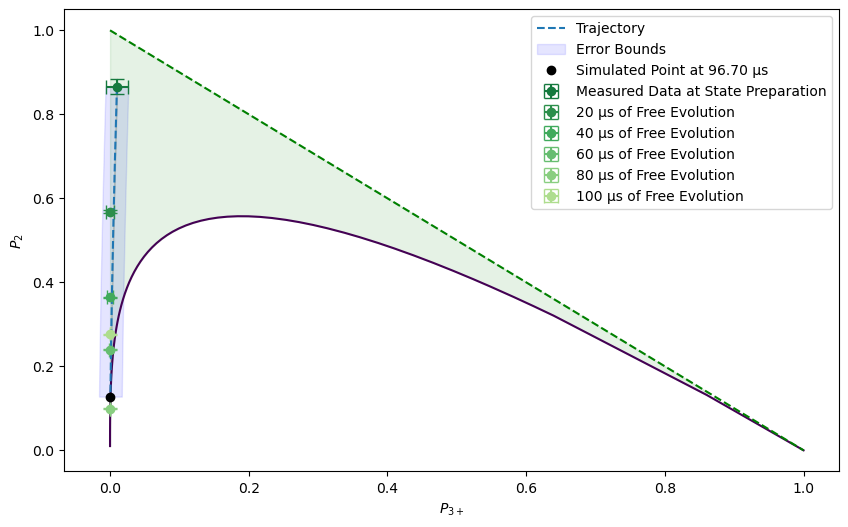

In [7]:
# Find the first intersection of the trajectory with the interpolated curve
first_intersection_time = None
first_intersection_P2 = None
first_intersection_P3 = None
first_intersection_state = None

for t, p2, p3, state in zip(times, populations_2, populations_3_plus, result.states):
    if p3 >= curve_x[0] and p3 <= curve_x[-1]:  # Ensure p3 is within the interpolation range
        curve_y_at_p3 = interp_curve_y(p3)
        if np.isclose(p2, curve_y_at_p3, atol=0.01):
            first_intersection_time = t
            first_intersection_P2 = p2
            first_intersection_P3 = p3
            first_intersection_state = state
            break

if first_intersection_time is not None:
    # Simulate the intermediate points for the trajectory
    trajectory_times = np.linspace(0, first_intersection_time, 500)
    trajectory_result = qt.mesolve(H, initial_state, trajectory_times, c_ops)
    trajectory_populations_2 = np.array([qt.expect(qt.fock_dm(N_dim, 2), state) for state in trajectory_result.states])
    trajectory_populations_3_plus = np.array([qt.expect(qt.fock_dm(N_dim, 3), state) for state in trajectory_result.states])

    # Calculate the standard deviation boundaries for the trajectory
    trajectory_populations_2_upper = trajectory_populations_2 + P_2_std
    trajectory_populations_2_lower = trajectory_populations_2 - P_2_std
    trajectory_populations_3_plus_upper = trajectory_populations_3_plus + P_3_plus_std
    trajectory_populations_3_plus_lower = trajectory_populations_3_plus - P_3_plus_std

    plt.figure(figsize=(10, 6))
    plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
    cmap = plt.get_cmap('YlGn')
    colors = cmap(np.linspace(0.2, 0.8, 8))
    plt.errorbar(P_3_plus, P_2, xerr=P_3_plus_std, yerr=P_2_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
    plt.errorbar(0, 0.5680484069, xerr=0.0063889518, yerr=0.0038008006, fmt='o', color=colors[6], capsize=5, label='20 μs of Free Evolution')
    plt.errorbar(0, 0.3640148218, xerr=0.0043575151, yerr=0.0021142198, fmt='o', color=colors[5], capsize=5, label='40 μs of Free Evolution')
    plt.errorbar(0, 0.2397277125, xerr=0.0018245901, yerr=0.0012858493, fmt='o', color=colors[4], capsize=5, label='60 μs of Free Evolution')
    plt.errorbar(0, 0.0993814694, xerr=0.0005064278, yerr=0.0008757672, fmt='o', color=colors[3], capsize=5, label='80 μs of Free Evolution')
    plt.errorbar(0, 0.2760915850, xerr=0, yerr=0.0007424157, fmt='o', color=colors[2], capsize=5, label='100 μs of Free Evolution')

    # Plotting the trajectory with error bounds
    plt.plot(trajectory_populations_3_plus, trajectory_populations_2, '--', label='Trajectory')
    plt.fill_betweenx(trajectory_populations_2, trajectory_populations_3_plus_lower, trajectory_populations_3_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
    plt.fill_between(trajectory_populations_3_plus, trajectory_populations_2_lower, trajectory_populations_2_upper, color='gray', alpha=0.3)
    plt.plot(first_intersection_P3, first_intersection_P2, 'ko', label=f'Simulated Point at {first_intersection_time:.2f} µs')
    plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
    plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
    plt.xlabel(r'$P_{3+}$')
    plt.ylabel(r'$P_{2}$')
    plt.legend()
    plt.title("")
    plt.show()
else:
    print("No point on the curve was reached within the given time range.")

# Fock 3

### Measured Point

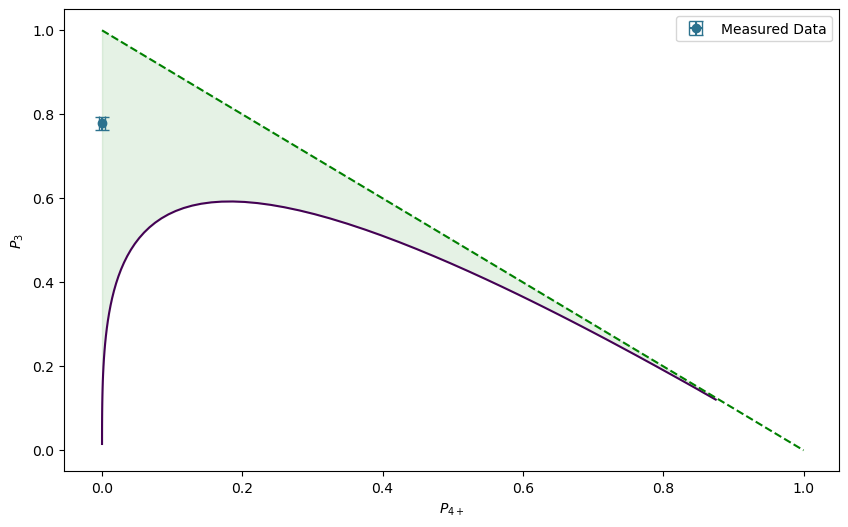

In [8]:
P_3 = 0.7787124743
P_3_std = 0.0150942712
P_4_plus = 0
P_4_plus_std = 0.0042541908

data = [
    (8.544583488534485e-7, 0.015082507791792273), (7.072523566575839e-6, 0.030546851177546727),
    (0.00002400238232658225, 0.04588462599418885), (0.000058461053510483474, 0.06172392916026184),
    (0.00011762570002338268, 0.0778840035635097), (0.00021757465732386017, 0.09558583459794831),
    (0.00035616737000365717, 0.11247784323084214), (0.0005487450965501184, 0.12967058965784897),
    (0.0008063946555405543, 0.14710199829340503), (0.0011408415263902683, 0.1647142044467469),
    (0.0015655657687511093, 0.1825011420854572), (0.002089826844415499, 0.20026917038276904),
    (0.0027347111382396427, 0.2182370812533119), (0.0035213325819993813, 0.23643153182155088),
    (0.0044575829991753135, 0.25458974942483165), (0.005568856837034564, 0.2728002932592687),
    (0.0068693316304724306, 0.29094069207333845), (0.008382329382336184, 0.30901474481449626),
    (0.01014822198181986, 0.3271561280602964), (0.012169156653302649, 0.3450768736393504),
    (0.014473782974579796, 0.36278177604997386), (0.0171029670516063, 0.38032934990514383),
    (0.020082719918464442, 0.39762240451480313), (0.023383826519761564, 0.414320498601521),
    (0.027139076380671145, 0.43089483121232897), (0.031340955416062855, 0.4470440332480447),
    (0.03596930543816934, 0.4625451842155652), (0.04114076881751649, 0.477607706949071),
    (0.04686172786309872, 0.4920545510084852), (0.05309046745239576, 0.5056654650422793),
    (0.0599772702072523, 0.5186278404300529), (0.06757206693246776, 0.5308557594944787),
    (0.0758132209988912, 0.542118053590128), (0.084722552146409, 0.5523604276222945),
    (0.09463287887255456, 0.5618055433516286), (0.10509704022218913, 0.5699241652097783),
    (0.11631387411095284, 0.5768604565123938), (0.12864354475027395, 0.5827167790422347),
    (0.1413946599666055, 0.5871228822751013), (0.15585759974299562, 0.5904082918632946),
    (0.17061425900981475, 0.5921614269133899), (0.18657616075872485, 0.592505555608929),
    (0.20335647385915268, 0.5913750525605399), (0.22185506860451876, 0.588607416849424),
    (0.24046783178966624, 0.5844285793593339), (0.2600799011613264, 0.5787132377445181),
    (0.28169387023687886, 0.5710615180104891), (0.3029887184054957, 0.562305368209827),
    (0.3251931034478399, 0.552046537241058), (0.34980876548207185, 0.5394890881478623),
    (0.3755043548716538, 0.5252094397965061), (0.39759482796487644, 0.5120780910177191),
    (0.42370327710593325, 0.49565951880672626), (0.4484132456069585, 0.4793038914585278),
    (0.473841039919667, 0.4617287582330171), (0.4966110765114895, 0.44540190654982265),
    (0.522303192329438, 0.42638004132929197), (0.5471270667602974, 0.4074472149581531),
    (0.5700724482050963, 0.38948715448169446), (0.592237939605891, 0.37175472012474803),
    (0.6113675871163738, 0.35615641487697874), (0.6294811292370683, 0.3411569795781614),
    (0.6511546285672658, 0.32295637241262654), (0.6665617373594629, 0.3098152673510555),
    (0.6846837420568228, 0.294206646488691), (0.7008015192069161, 0.28015062620829406),
    (0.7186189555771001, 0.26448544032412596), (0.7315244023980204, 0.2529910493441732),
    (0.7446926328091772, 0.24118307724304341), (0.7621877906151919, 0.225447163481738),
    (0.7720167807664942, 0.21646869694977144), (0.7879252842344182, 0.20195896619812875),
    (0.7985929432034045, 0.19211698373273367), (0.8120241998316623, 0.17971217239539675),
    (0.8263825725339896, 0.1664088570052298), (0.8395137257700329, 0.1541548079474997),
    (0.8504951114787028, 0.14383760818040678), (0.854911716545994, 0.1395361238238705),
    (0.8644387793428006, 0.1305182387679361), (0.8747134196986535, 0.12076468933699212)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_4_plus, P_3, xerr=P_4_plus_std, yerr=P_3_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{4+}$')
plt.ylabel(r'$P_{3}$')
plt.title("")
plt.legend()
plt.show()

### Trajectory Which Finds the Closest Distance Reached

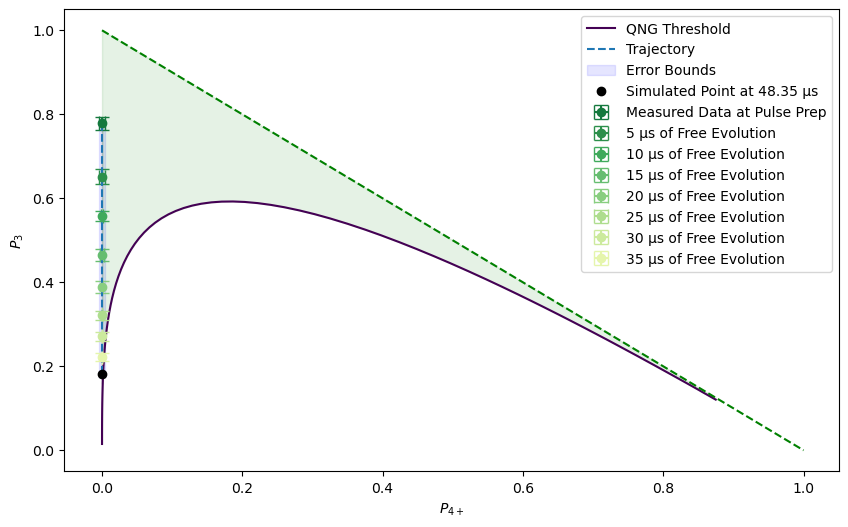

In [9]:
N_dim = 10
T1 = 100
T2 = 60
a = qt.destroy(N_dim)

# Given population
populations = [0.0706912732, 0.0482660660, 0.1023301865, 0.7787124743, 0.0000000000]
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, N_dim - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Relaxation
c_ops = [np.sqrt(1/T1) * a]

# Hamiltonian
H = a.dag() * a * 0

# Time array (in microseconds)
times = np.linspace(0, 50, 1000)

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)

# Extract the populations of Fock states 3 and 4+ over time
populations_3 = np.array([qt.expect(qt.fock_dm(N_dim, 3), state) for state in result.states])
populations_4_plus = np.array([qt.expect(qt.fock_dm(N_dim, 4), state) for state in result.states])

# Calculate the standard deviation boundaries for the trajectory
populations_3_upper = populations_3 + P_3_std
populations_3_lower = populations_3 - P_3_std
populations_4_plus_upper = populations_4_plus + P_4_plus_std
populations_4_plus_lower = populations_4_plus - P_4_plus_std

# Create interpolation functions for the curve
interp_curve_y = interp1d(curve_x, curve_y, kind='cubic')

plt.figure(figsize=(10, 6))
plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF', label='QNG Threshold')
cmap = plt.get_cmap('YlGn')
colors = cmap(np.linspace(0.2, 0.8, 8))
plt.errorbar(P_4_plus, P_3, xerr=P_4_plus_std, yerr=P_3_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at Pulse Prep')
plt.errorbar(0, 0.6519007862, xerr=0.0038695476, yerr=0.0168562885, fmt='o', color=colors[6], capsize=5, label='5 μs of Free Evolution')
plt.errorbar(0, 0.5577075221, xerr=0.0014230838, yerr=0.0127027069, fmt='o', color=colors[5], capsize=5, label='10 μs of Free Evolution')
plt.errorbar(0, 0.4641036068, xerr=0.0031104784, yerr=0.0142692578, fmt='o', color=colors[4], capsize=5, label='15 μs of Free Evolution')
plt.errorbar(0, 0.3887954206, xerr=0, yerr=0.0133867511, fmt='o', color=colors[3], capsize=5, label='20 μs of Free Evolution')
plt.errorbar(0, 0.3213347121, xerr=0, yerr=0.0106368706, fmt='o', color=colors[2], capsize=5, label='25 μs of Free Evolution')
plt.errorbar(0, 0.2718164649, xerr=0, yerr=0.0106752801, fmt='o', color=colors[1], capsize=5, label='30 μs of Free Evolution')
plt.errorbar(0, 0.2220780779, xerr=0, yerr=0.0097712970, fmt='o', color=colors[0], capsize=5, label='35 μs of Free Evolution')

# Plotting the trajectory with error bounds
plt.plot(populations_4_plus, populations_3, '--', label='Trajectory')
plt.fill_betweenx(populations_3, populations_4_plus_lower, populations_4_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
plt.fill_between(populations_4_plus, populations_3_lower, populations_3_upper, color='gray', alpha=0.3)

# Find the closest point on the trajectory to the curve
min_distance = float('inf')
closest_P3 = None
closest_P4 = None
closest_time = None
for t, p3, p4 in zip(times, populations_3, populations_4_plus):
    distances = distance.cdist([(p4, p3)], list(zip(curve_x, curve_y)))
    min_dist_idx = np.argmin(distances)
    if distances[0, min_dist_idx] < min_distance:
        min_distance = distances[0, min_dist_idx]
        closest_P3 = p3
        closest_P4 = p4
        closest_time = t

plt.plot(closest_P4, closest_P3, 'ko', label=f'Simulated Point at {closest_time:.2f} µs')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{4+}$')
plt.ylabel(r'$P_{3}$')
plt.legend()
plt.title("")
plt.show()

### Trajectory Which Finds the First Interaction 

In [10]:
# Find the first intersection of the trajectory with the interpolated curve
first_intersection_time = None
first_intersection_P3 = None
first_intersection_P4 = None
first_intersection_state = None

for t, p3, p4, state in zip(times, populations_3, populations_4_plus, result.states):
    if p4 >= curve_x[0] and p4 <= curve_x[-1]:  # Ensure p4 is within the interpolation range
        curve_y_at_p4 = interp_curve_y(p4)
        if np.isclose(p3, curve_y_at_p4, atol=0.01):
            first_intersection_time = t
            first_intersection_P3 = p3
            first_intersection_P4 = p4
            first_intersection_state = state
            break

if first_intersection_time is not None:
    # Simulate the intermediate points for the trajectory
    trajectory_times = np.linspace(0, first_intersection_time, 500)
    trajectory_result = qt.mesolve(H, initial_state, trajectory_times, c_ops)
    trajectory_populations_3 = np.array([qt.expect(qt.fock_dm(N_dim, 3), state) for state in trajectory_result.states])
    trajectory_populations_4_plus = np.array([qt.expect(qt.fock_dm(N_dim, 4), state) for state in trajectory_result.states])

    # Calculate the standard deviation boundaries for the trajectory
    trajectory_populations_3_upper = trajectory_populations_3 + P_3_std
    trajectory_populations_3_lower = trajectory_populations_3 - P_3_std
    trajectory_populations_4_plus_upper = trajectory_populations_4_plus + P_4_plus_std
    trajectory_populations_4_plus_lower = trajectory_populations_4_plus - P_4_plus_std

    plt.figure(figsize=(10, 6))
    plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
    cmap = plt.get_cmap('YlGn')
    colors = cmap(np.linspace(0.2, 0.8, 8))
    plt.errorbar(P_4_plus, P_3, xerr=P_4_plus_std, yerr=P_3_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
    plt.errorbar(0, 0.6519007862, xerr=0.0038695476, yerr=0.0168562885, fmt='o', color=colors[6], capsize=5, label='5 μs of Free Evolution')
    plt.errorbar(0, 0.5577075221, xerr=0.0014230838, yerr=0.0127027069, fmt='o', color=colors[5], capsize=5, label='10 μs of Free Evolution')
    plt.errorbar(0, 0.4641036068, xerr=0.0031104784, yerr=0.0142692578, fmt='o', color=colors[4], capsize=5, label='15 μs of Free Evolution')
    plt.errorbar(0, 0.3887954206, xerr=0, yerr=0.0133867511, fmt='o', color=colors[3], capsize=5, label='20 μs of Free Evolution')
    plt.errorbar(0, 0.3213347121, xerr=0, yerr=0.0106368706, fmt='o', color=colors[2], capsize=5, label='25 μs of Free Evolution')
    plt.errorbar(0, 0.2718164649, xerr=0, yerr=0.0106752801, fmt='o', color=colors[1], capsize=5, label='30 μs of Free Evolution')
    plt.errorbar(0, 0.2220780779, xerr=0, yerr=0.0097712970, fmt='o', color=colors[0], capsize=5, label='35 μs of Free Evolution')

    # Plotting the trajectory with error bounds
    plt.plot(trajectory_populations_4_plus, trajectory_populations_3, '--', label='Trajectory')
    plt.fill_betweenx(trajectory_populations_3, trajectory_populations_4_plus_lower, trajectory_populations_4_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
    plt.fill_between(trajectory_populations_4_plus, trajectory_populations_3_lower, trajectory_populations_3_upper, color='gray', alpha=0.3)
    plt.plot(first_intersection_P4, first_intersection_P3, 'ko', label=f'Simulated Point at {first_intersection_time:.2f} µs')
    plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
    plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
    plt.xlabel(r'$P_{4+}$')
    plt.ylabel(r'$P_{3}$')
    plt.legend()
    plt.title("")
    plt.show()
else:
    print("No point on the curve was reached within the given time range.")

No point on the curve was reached within the given time range.


# Fock 4

### Measured Point

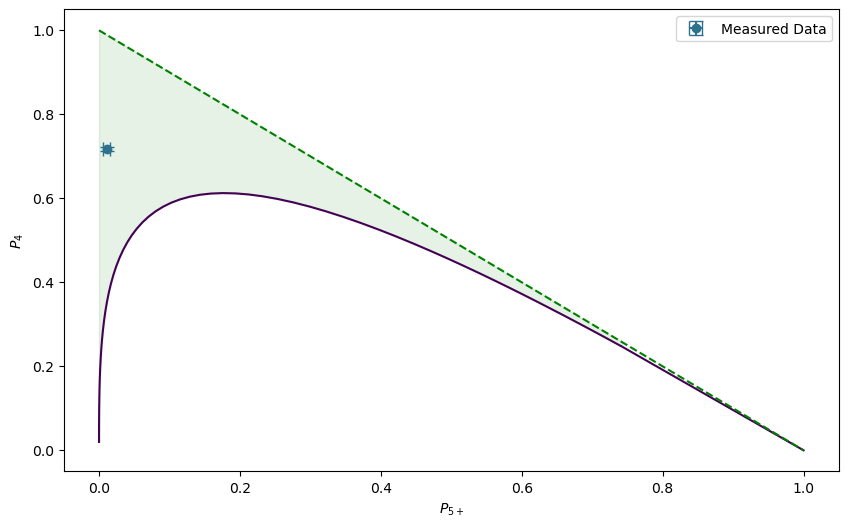

In [11]:
P_4 = 0.7179546765
P_4_std = 0.0047494966
P_5_plus = 0.0109298861
P_5_plus_std = 0.0047112238

data = [
    (1.6872541787060769e-6, 0.02000792834512809), (0.00001368091834652585, 0.040050250573760104),
    (0.00004970687508842886, 0.061761982352349566), (0.0001226190596965715, 0.08344692932543432),
    (0.0002469348154959805, 0.10518561872791388), (0.00044132173102506833, 0.12731391562770197),
    (0.0007241149962581295, 0.14969154712562424), (0.0011157601985318788, 0.17226184174355955),
    (0.0016383725343773747, 0.1949682582869272), (0.0023190494610452195, 0.21786468666368694),
    (0.0031772855612310913, 0.24067060623041825), (0.004252024954478406, 0.2636103107982458),
    (0.005574646543538453, 0.2865804613458144), (0.007156040168357358, 0.3091727425019941),
    (0.009064300716023377, 0.3317942988778692), (0.011284248216066217, 0.3538075853109543),
    (0.01392594148534898, 0.3758329656839692), (0.01695570996609841, 0.3971606476912231),
    (0.020471147378193, 0.4181303787889049), (0.02448178517578703, 0.43844025734832814),
    (0.029078954569651927, 0.45821773748492434), (0.03419990713263932, 0.47694459232990744),
    (0.040067832982251805, 0.49515561533541164), (0.04650221744940186, 0.5120691857107007),
    (0.05374873544280223, 0.5281428639312838), (0.061701662185668305, 0.5429484836456523),
    (0.07062630532954817, 0.5567695458576017), (0.08023223109053601, 0.5690138996025934),
    (0.09072320837950132, 0.579889097047021), (0.10243600977686618, 0.5895368364544213),
    (0.11500803549021299, 0.5975029749963778), (0.12876235084070375, 0.6039042724577364),
    (0.1432274711069742, 0.6084823711989713), (0.15871797428166867, 0.6113546322053103),
    (0.17538400171188062, 0.6124805423563078), (0.19357363591589416, 0.6117604067577375),
    (0.2120932542210281, 0.6092605432417785), (0.23148955012325945, 0.6050172556394741),
    (0.2530006273644243, 0.5986536027091707), (0.2757035498642477, 0.5903150648787198),
    (0.2994208566636565, 0.5800761784367097), (0.32198924491043246, 0.5690790397912915),
    (0.34708105281941937, 0.5556011255967963), (0.37185131691028406, 0.5411576508549608),
    (0.39746045517773343, 0.5251881080238505), (0.42195201174337393, 0.5090298862585111),
    (0.4450434295990482, 0.4930863908585794), (0.47053998332200353, 0.47476712088685913),
    (0.4927431816253317, 0.45824670211565705), (0.5178858213495048, 0.43898208362058305),
    (0.5423027309405251, 0.4197411512385003), (0.5599050374811119, 0.4055363085748343),
    (0.5817066762122439, 0.38765646705633167), (0.6028617763034727, 0.3699735082899858),
    (0.6220567912412915, 0.353675705135269), (0.6376945500697786, 0.34019925264826417),
    (0.6598627442103071, 0.32092710156993176), (0.6790406242054394, 0.30401636533099347),
    (0.6966581496281355, 0.28831717887437036), (0.7123170069261264, 0.27421777703817724),
    (0.7424811303903173, 0.24673487248555032), (1, 0)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_5_plus, P_4, xerr=P_5_plus_std, yerr=P_4_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{5+}$')
plt.ylabel(r'$P_{4}$')
plt.title("")
plt.legend()
plt.show()

### Trajectory Which Finds the Closest Distance Reached

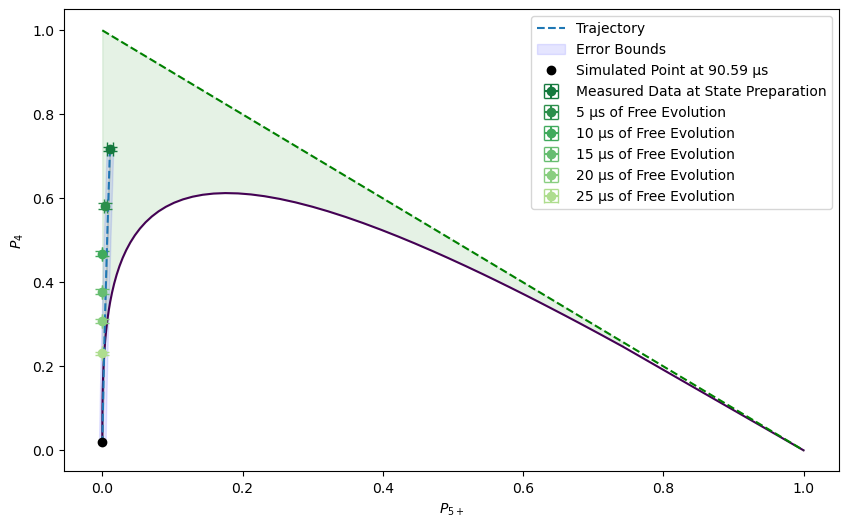

In [12]:
N_dim = 10
T1 = 100
T2 = 60
a = qt.destroy(N_dim)

# Given population
populations = [0.0825963820, 0.0348819048, 0.0452207620,  0.1084163886,  0.7179546765, 0.0109298861]
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, N_dim - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Relaxation
c_ops = [np.sqrt(1/T1) * a]

# Hamiltonian
H = a.dag() * a * 0

# Time array (in microseconds)
times = np.linspace(0, 100, 1000)

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)

# Extract the populations of Fock states 4 and 5+ over time
populations_4 = np.array([qt.expect(qt.fock_dm(N_dim, 4), state) for state in result.states])
populations_5_plus = np.array([1 - sum(qt.expect(qt.fock_dm(N_dim, i), state) for i in range(5)) for state in result.states])

# Calculate the standard deviation boundaries for the trajectory
populations_4_upper = populations_4 + P_4_std
populations_4_lower = populations_4 - P_4_std
populations_5_plus_upper = populations_5_plus + P_5_plus_std
populations_5_plus_lower = populations_5_plus - P_5_plus_std

# Create interpolation functions for the curve
interp_curve_y = interp1d(curve_x, curve_y, kind='cubic')

cmap = plt.get_cmap('YlGn')
colors = cmap(np.linspace(0.2, 0.8, 8))
plt.figure(figsize=(10, 6))
plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
plt.errorbar(P_5_plus, P_4, xerr=P_5_plus_std, yerr=P_4_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
plt.errorbar(0.0040924561, 0.5816308347, xerr=0.0020486226, yerr=0.0071560346, fmt='o', color=colors[6], capsize=5, label='5 μs of Free Evolution')
plt.errorbar(0, 0.4684405988, xerr=0.0000940919, yerr=0.0059766600, fmt='o', color=colors[5], capsize=5, label='10 μs of Free Evolution')
plt.errorbar(0, 0.3779040985, xerr=0, yerr=0.0067029137, fmt='o', color=colors[4], capsize=5, label='15 μs of Free Evolution')
plt.errorbar(0, 0.3073005181, xerr=0, yerr=0.0043527447, fmt='o', color=colors[3], capsize=5, label='20 μs of Free Evolution')
plt.errorbar(0, 0.2310945311, xerr=0, yerr=0.0040583098, fmt='o', color=colors[2], capsize=5, label='25 μs of Free Evolution')

# Plotting the trajectory with error bounds
plt.plot(populations_5_plus, populations_4, '--', label='Trajectory')
plt.fill_betweenx(populations_4, populations_5_plus_lower, populations_5_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
plt.fill_between(populations_5_plus, populations_4_lower, populations_4_upper, color='gray', alpha=0.3)

# Find the closest point on the trajectory to the curve
min_distance = float('inf')
closest_P4 = None
closest_P5 = None
closest_time = None
for t, p4, p5 in zip(times, populations_4, populations_5_plus):
    distances = distance.cdist([(p5, p4)], list(zip(curve_x, curve_y)))
    min_dist_idx = np.argmin(distances)
    if distances[0, min_dist_idx] < min_distance:
        min_distance = distances[0, min_dist_idx]
        closest_P4 = p4
        closest_P5 = p5
        closest_time = t

plt.plot(closest_P5, closest_P4, 'ko', label=f'Simulated Point at {closest_time:.2f} µs')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{5+}$')
plt.ylabel(r'$P_{4}$')
plt.legend()
plt.title("")
plt.show()

### Trajectory Which Finds the First Interaction

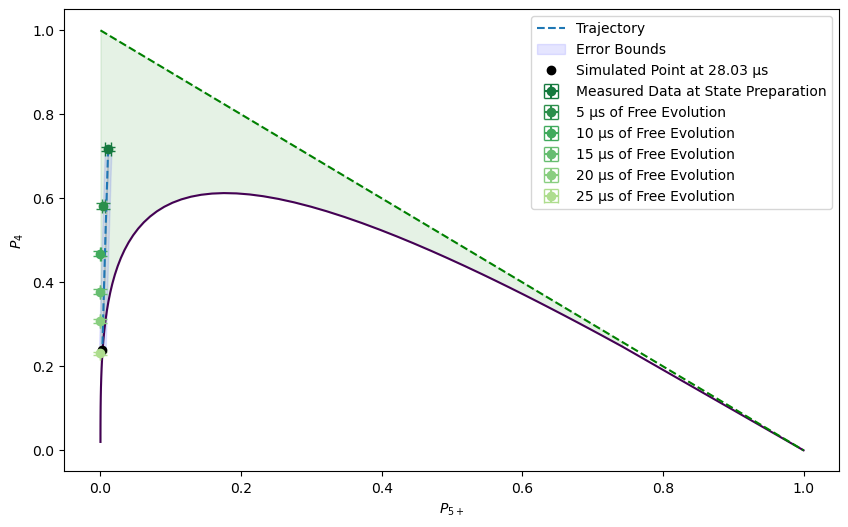

In [13]:
# Find the first intersection of the trajectory with the interpolated curve
first_intersection_time = None
first_intersection_P4 = None
first_intersection_P5_plus = None
first_intersection_state = None

for t, p4, p5_plus, state in zip(times, populations_4, populations_5_plus, result.states):
    curve_y_at_p5_plus = interp_curve_y(p5_plus)
    if np.isclose(p4, curve_y_at_p5_plus, atol=0.01):
        first_intersection_time = t
        first_intersection_P4 = p4
        first_intersection_P5_plus = p5_plus
        first_intersection_state = state
        break

if first_intersection_time is not None:
    # Simulate the intermediate points for the trajectory
    trajectory_times = np.linspace(0, first_intersection_time, 500)
    trajectory_result = qt.mesolve(H, initial_state, trajectory_times, c_ops)
    trajectory_populations_4 = np.array([qt.expect(qt.fock_dm(N_dim, 4), state) for state in trajectory_result.states])
    trajectory_populations_5_plus = np.array([1 - sum(qt.expect(qt.fock_dm(N_dim, i), state) for i in range(5)) for state in trajectory_result.states])

    # Calculate the standard deviation boundaries for the trajectory
    trajectory_populations_4_upper = trajectory_populations_4 + P_4_std
    trajectory_populations_4_lower = trajectory_populations_4 - P_4_std
    trajectory_populations_5_plus_upper = trajectory_populations_5_plus + P_5_plus_std
    trajectory_populations_5_plus_lower = trajectory_populations_5_plus - P_5_plus_std

    # Find the highest point on the interpolated curve
    x_max = curve_x[np.argmax(curve_y)]
    curve_x = np.array(curve_x)

    cmap = plt.get_cmap('YlGn')
    colors = cmap(np.linspace(0.2, 0.8, 8)) 
    plt.figure(figsize=(10, 6))
    plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
    plt.errorbar(P_5_plus, P_4, xerr=P_5_plus_std, yerr=P_4_std, fmt='o', color=colors[7], capsize=5, label='Measured Data at State Preparation')
    plt.errorbar(0.0040924561, 0.5816308347, xerr=0.0020486226, yerr=0.0071560346, fmt='o', color=colors[6], capsize=5, label='5 μs of Free Evolution')
    plt.errorbar(0, 0.4684405988, xerr=0.0000940919, yerr=0.0059766600, fmt='o', color=colors[5], capsize=5, label='10 μs of Free Evolution')
    plt.errorbar(0, 0.3779040985, xerr=0, yerr=0.0067029137, fmt='o', color=colors[4], capsize=5, label='15 μs of Free Evolution')
    plt.errorbar(0, 0.3073005181, xerr=0, yerr=0.0043527447, fmt='o', color=colors[3], capsize=5, label='20 μs of Free Evolution')
    plt.errorbar(0, 0.2310945311, xerr=0, yerr=0.0040583098, fmt='o', color=colors[2], capsize=5, label='25 μs of Free Evolution')

    # Plotting the trajectory with error bounds
    plt.plot(trajectory_populations_5_plus, trajectory_populations_4, '--', label='Trajectory')
    plt.fill_betweenx(trajectory_populations_4, trajectory_populations_5_plus_lower, trajectory_populations_5_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
    plt.fill_between(trajectory_populations_5_plus, trajectory_populations_4_lower, trajectory_populations_4_upper, color='gray', alpha=0.3)
    plt.plot(first_intersection_P5_plus, first_intersection_P4, 'ko', label=f'Simulated Point at {first_intersection_time:.2f} µs')
    plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
    plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
    plt.xlabel(r'$P_{5+}$')
    plt.ylabel(r'$P_{4}$')
    plt.legend()
    plt.title("")
    plt.show()
else:
    print("No point on the curve was reached within the given time range.")

# Fock 5

### Measured Point

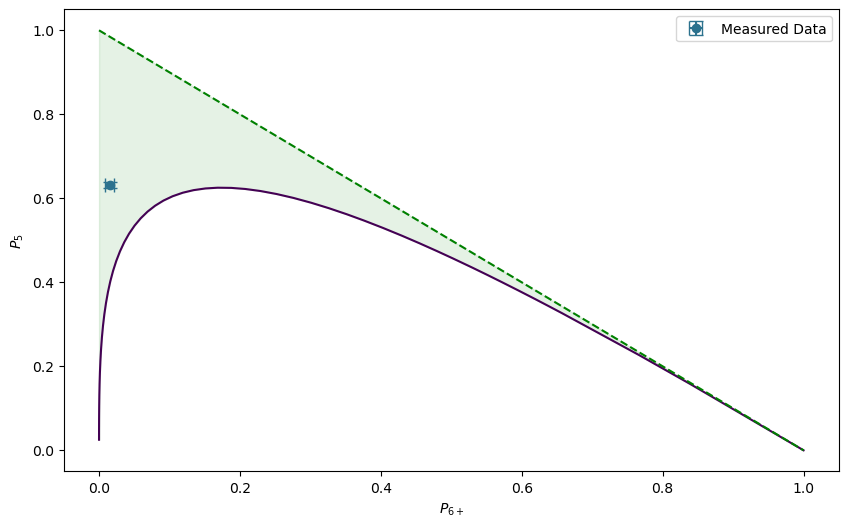

In [14]:
P_5 = 0.6318156102
P_5_std = 0.0061704355
P_6_plus = 0.0153201444
P_6_plus_std = 0.0065584873

data = [
    (3.0146801205388485e-6, 0.025208709529793677), (0.000025081722768494075, 0.05106679230370519),
    (0.00008809732876224885, 0.07749503828136867), (0.00021642978508995547, 0.1042771243050959),
    (0.00043805138136132626, 0.13143493674673107), (0.0007827211147488633, 0.15881115304389118),
    (0.0012856593049546117, 0.1864591391329105), (0.0019820473394573934, 0.2141689884841857),
    (0.002907176018994262, 0.2417370271160219), (0.004115434542988683, 0.269435093720619),
    (0.005641529991557093, 0.2968185040424564), (0.007538741079072708, 0.32393928708999487),
    (0.009860493585836405, 0.3506668170112376), (0.012677652990657706, 0.3770243461016518),
    (0.015985633650635656, 0.40239057759557556), (0.01991299028037008, 0.4272058201139038),
    (0.02445589197975484, 0.4509503899768067), (0.029724599103732263, 0.47377296872565233),
    (0.0357713540828406, 0.4954858900967077), (0.042626017761443036, 0.515857451286093),
    (0.050384926244630535, 0.5348827363692058), (0.05909280883594137, 0.5523889296776945),
    (0.06887397716019827, 0.568359163339864), (0.07961561329599953, 0.5824307717114677),
    (0.09143372325120325, 0.594641880115341), (0.10445447539031749, 0.6049682642957639),
    (0.11888813353349259, 0.6133724240655894), (0.13416439050902995, 0.6194736031763262),
    (0.15100374136426686, 0.6235122779487935), (0.1684239107930674, 0.6252655495359546),
    (0.1877350891342805, 0.6248430628654722), (0.20758553196008744, 0.6222536622523974),
    (0.22915705992545266, 0.6173820185342429), (0.2519788908839463, 0.6102632514639225),
    (0.2757525158040355, 0.6010367558721937), (0.30095190945743755, 0.5895427929429039),
    (0.32646575859851323, 0.5763713797681214), (0.35183133889427387, 0.561953933729931),
    (0.3762085574984738, 0.5470173797482417), (0.40312845972048117, 0.5294437271726987),
    (0.42989610684443935, 0.5109785601356922), (0.4550348866741516, 0.49283177843852516),
    (0.47951100176524686, 0.47449057292380775), (0.5025325340274749, 0.45669706850645775),
    (0.5299663678655565, 0.4348888445603017), (0.5514195874942129, 0.41738008307777663),
    (0.5708620219546344, 0.4012027021235172), (0.5942805660850963, 0.38139443223196295),
    (0.6182333952420405, 0.3607926618028324), (0.6361509451265486, 0.34510560934567686),
    (0.6573434925889673, 0.3263682115397332), (0.7667008297911371, 0.2266273447334285),
    (0.8381752244756095, 0.15878530427434137), (1, 0)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_6_plus, P_5, xerr=P_6_plus_std, yerr=P_5_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{6+}$')
plt.ylabel(r'$P_{5}$')
plt.title("")
plt.legend()
plt.show()

### Trajectory Which Finds the Closest Distance Reached

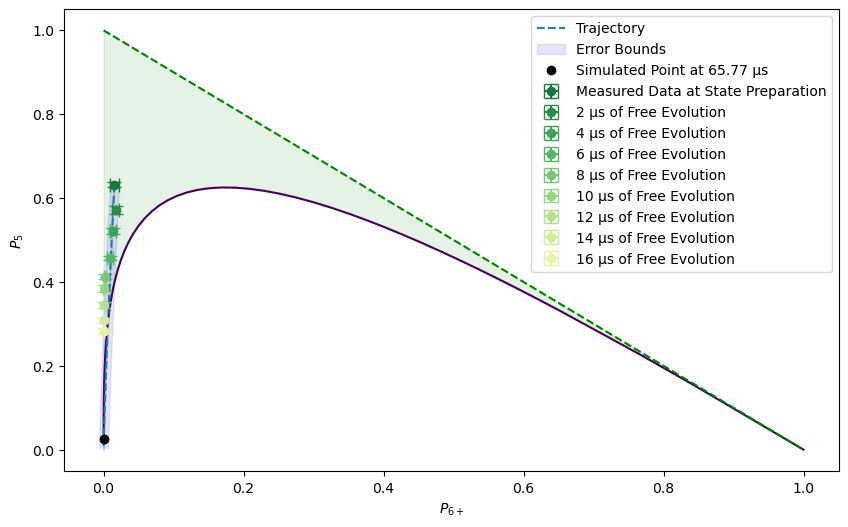

In [15]:
N_dim = 10
T1 = 100
T2 = 60
a = qt.destroy(N_dim)

# Given population
populations = [0.0842437445, 0.0373748047, 0.0429731490, 0.0474054912, 0.1408670560, 0.6318156102, 0.0153201444]
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, N_dim - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Relaxation
c_ops = [np.sqrt(1/T1) * a]

# Hamiltonian
H = a.dag() * a * 0

# Time array (in microseconds)
times = np.linspace(0, 100, 1000)

# Create interpolation functions for the curve
interp_curve_y = interp1d(curve_x, curve_y, kind='cubic')

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)

# Extract the populations of Fock states 5 and 6+ over time
populations_5 = np.array([qt.expect(qt.fock_dm(N_dim, 5), state) for state in result.states])
populations_6_plus = np.array([1 - sum(qt.expect(qt.fock_dm(N_dim, i), state) for i in range(6)) for state in result.states])

# Calculate the standard deviation boundaries for the trajectory
populations_5_upper = populations_5 + P_5_std
populations_5_lower = populations_5 - P_5_std
populations_6_plus_upper = populations_6_plus + P_6_plus_std
populations_6_plus_lower = populations_6_plus - P_6_plus_std

cmap = plt.get_cmap('YlGn')
colors = cmap(np.linspace(0.2, 0.8, 9)) 
plt.figure(figsize=(10, 6))
plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
plt.errorbar(P_6_plus, P_5, xerr=P_6_plus_std, yerr=P_5_std, fmt='o', color=colors[8], capsize=5, label='Measured Data at State Preparation')
plt.errorbar(0.0171343310, 0.5718982076, xerr=0.0051423350, yerr=0.0087972921, fmt='o', color=colors[7], capsize=5, label='2 μs of Free Evolution')
plt.errorbar(0.0130745348, 0.5211131291, xerr=0.0041262055, yerr=0.0065588640, fmt='o', color=colors[6], capsize=5, label='4 μs of Free Evolution')
plt.errorbar(0.0093784434, 0.4573364881, xerr=0.0046060644, yerr=0.0051310189, fmt='o', color=colors[5], capsize=5, label='6 μs of Free Evolution')
plt.errorbar(0.0023651996, 0.4128955518, xerr=0.0015948564, yerr=0.0069684653, fmt='o', color=colors[4], capsize=5, label='8 μs of Free Evolution')
plt.errorbar(0.0001900682, 0.3841446845, xerr=0.0004440972, yerr=0.0077100308, fmt='o', color=colors[3], capsize=5, label='10 μs of Free Evolution')
plt.errorbar(0, 0.3452106225, xerr=0, yerr=0.0069915856, fmt='o', color=colors[2], capsize=5, label='12 μs of Free Evolution')
plt.errorbar(0, 0.3084493081, xerr=0, yerr=0.0060210937, fmt='o', color=colors[1], capsize=5, label='14 μs of Free Evolution')
plt.errorbar(0, 0.2820424271, xerr=0, yerr=0.0073375994, fmt='o', color=colors[0], capsize=5, label='16 μs of Free Evolution')

# Plotting the trajectory with error bounds
plt.plot(populations_6_plus, populations_5, '--', label='Trajectory')
plt.fill_betweenx(populations_5, populations_6_plus_lower, populations_6_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
plt.fill_between(populations_6_plus, populations_5_lower, populations_5_upper, color='gray', alpha=0.3)

# Find the closest point on the trajectory to the curve
min_distance = float('inf')
closest_P5 = None
closest_P6 = None
closest_time = None
for t, p5, p6 in zip(times, populations_5, populations_6_plus):
    distances = distance.cdist([(p6, p5)], list(zip(curve_x, curve_y)))
    min_dist_idx = np.argmin(distances)
    if distances[0, min_dist_idx] < min_distance:
        min_distance = distances[0, min_dist_idx]
        closest_P5 = p5
        closest_P6 = p6
        closest_time = t

plt.plot(closest_P6, closest_P5, 'ko', label=f'Simulated Point at {closest_time:.2f} µs')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{6+}$')
plt.ylabel(r'$P_{5}$')
plt.legend()
plt.title("")
plt.show()

### Trajectory Which Finds the First Interaction

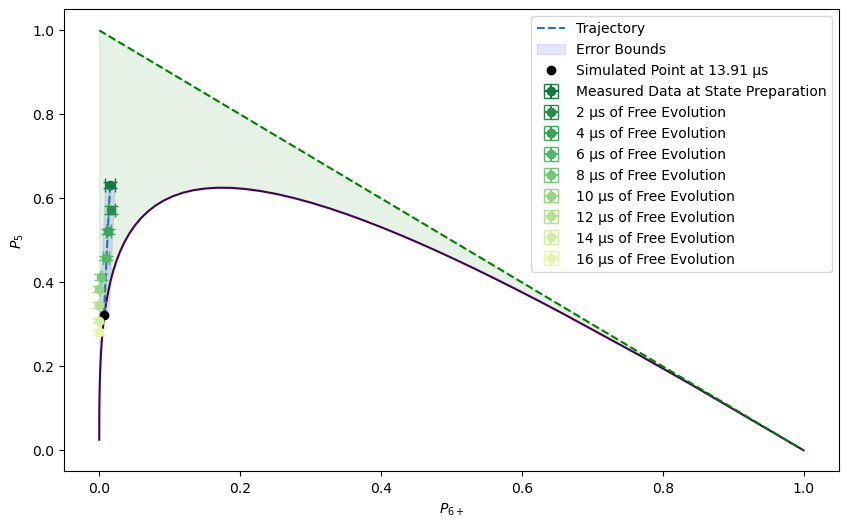

In [16]:
# Find the first intersection of the trajectory with the interpolated curve
first_intersection_time = None
first_intersection_P5 = None
first_intersection_P6_plus = None
first_intersection_state = None

for t, p5, p6_plus, state in zip(times, populations_5, populations_6_plus, result.states):
    curve_y_at_p6_plus = interp_curve_y(p6_plus)
    if np.isclose(p5, curve_y_at_p6_plus, atol=0.01):
        first_intersection_time = t
        first_intersection_P5 = p5
        first_intersection_P6_plus = p6_plus
        first_intersection_state = state
        break
        
if first_intersection_time is not None:
    # Simulate the intermediate points for the trajectory
    trajectory_times = np.linspace(0, first_intersection_time, 500)
    trajectory_result = qt.mesolve(H, initial_state, trajectory_times, c_ops)
    trajectory_populations_5 = np.array([qt.expect(qt.fock_dm(N_dim, 5), state) for state in trajectory_result.states])
    trajectory_populations_6_plus = np.array([1 - sum(qt.expect(qt.fock_dm(N_dim, i), state) for i in range(6)) for state in trajectory_result.states])

    # Calculate the standard deviation boundaries for the trajectory
    trajectory_populations_5_upper = trajectory_populations_5 + P_5_std
    trajectory_populations_5_lower = trajectory_populations_5 - P_5_std
    trajectory_populations_6_plus_upper = trajectory_populations_6_plus + P_6_plus_std
    trajectory_populations_6_plus_lower = trajectory_populations_6_plus - P_6_plus_std

    # Find the highest point on the interpolated curve
    x_max = curve_x[np.argmax(curve_y)]
    curve_x = np.array(curve_x)

    cmap = plt.get_cmap('YlGn')
    colors = cmap(np.linspace(0.2, 0.8, 9))
    plt.figure(figsize=(10, 6))
    plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
    plt.errorbar(P_6_plus, P_5, xerr=P_6_plus_std, yerr=P_5_std, fmt='o', color=colors[8], capsize=5, label='Measured Data at State Preparation')
    plt.errorbar(0.0171343310, 0.5718982076, xerr=0.0051423350, yerr=0.0087972921, fmt='o', color=colors[7], capsize=5, label='2 μs of Free Evolution')
    plt.errorbar(0.0130745348, 0.5211131291, xerr=0.0041262055, yerr=0.0065588640, fmt='o', color=colors[6], capsize=5, label='4 μs of Free Evolution')
    plt.errorbar(0.0093784434, 0.4573364881, xerr=0.0046060644, yerr=0.0051310189, fmt='o', color=colors[5], capsize=5, label='6 μs of Free Evolution')
    plt.errorbar(0.0023651996, 0.4128955518, xerr=0.0015948564, yerr=0.0069684653, fmt='o', color=colors[4], capsize=5, label='8 μs of Free Evolution')
    plt.errorbar(0.0001900682, 0.3841446845, xerr=0.0004440972, yerr=0.0077100308, fmt='o', color=colors[3], capsize=5, label='10 μs of Free Evolution')
    plt.errorbar(0, 0.3452106225, xerr=0, yerr=0.0069915856, fmt='o', color=colors[2], capsize=5, label='12 μs of Free Evolution')
    plt.errorbar(0, 0.3084493081, xerr=0, yerr=0.0060210937, fmt='o', color=colors[1], capsize=5, label='14 μs of Free Evolution')
    plt.errorbar(0, 0.2820424271, xerr=0, yerr=0.0073375994, fmt='o', color=colors[0], capsize=5, label='16 μs of Free Evolution')

    # Plotting the trajectory with error bounds
    plt.plot(trajectory_populations_6_plus, trajectory_populations_5, '--', label='Trajectory')
    plt.fill_betweenx(trajectory_populations_5, trajectory_populations_6_plus_lower, trajectory_populations_6_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
    plt.fill_between(trajectory_populations_6_plus, trajectory_populations_5_lower, trajectory_populations_5_upper, color='gray', alpha=0.3)
    plt.plot(first_intersection_P6_plus, first_intersection_P5, 'ko', label=f'Simulated Point at {first_intersection_time:.2f} µs')
    plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
    plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
    plt.xlabel(r'$P_{6+}$')
    plt.ylabel(r'$P_{5}$')
    plt.legend()
    plt.title("")
    plt.show()
else:
    print("No point on the curve was reached within the given time range.")

# Fock 6

### Measured Point

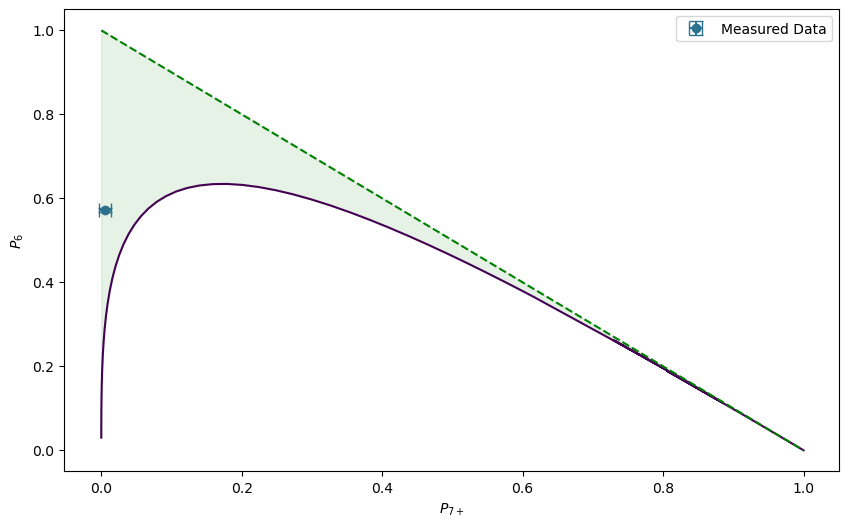

In [17]:
P_6 = 0.5719346755
P_6_std = 0.0051595332
P_7_plus = 0.0053061237
P_7_plus_std = 0.0084672079

data = [
    (4.838494734205057e-6, 0.030277188816998857), (0.00003590236258510515, 0.055226242891916875),
    (0.00014212718897255172, 0.09303065831956173), (0.0003489110345146207, 0.12498618238551788),
    (0.0007073029687073573, 0.15738007072497673), (0.0012652522047948978, 0.18989877618895454),
    (0.0020817815258580286, 0.22259959653552713), (0.0032064122748675095, 0.2549879004290935),
    (0.0047106786700816805, 0.2872060589973146), (0.00666134384574657, 0.3190166570433222),
    (0.009118675171041257, 0.3501312460017052), (0.01218100264093569, 0.38065077244648277),
    (0.01590722486684326, 0.41018313807973983), (0.020370951016627892, 0.43854644420337174),
    (0.025645438991427127, 0.4655651242434967), (0.031857486937339585, 0.4912737468463406),
    (0.03908680947438281, 0.5154282747536227), (0.047237064667248974, 0.5373851631515152),
    (0.05669792819477515, 0.5578202004017101), (0.06732374410020592, 0.5760189079895838),
    (0.07910089817833588, 0.5918038670019207), (0.09224651483332535, 0.6053018598888338),
    (0.10694629529069832, 0.61645276135922), (0.12252584170884673, 0.6247391698750521),
    (0.1400128390443094, 0.6306390590435181), (0.1588897194345027, 0.633802453606411),
    (0.17879421967595444, 0.6342481460548277), (0.20038859094317618, 0.6320188826725118),
    (0.22433964590124855, 0.6268560318220976), (0.2485751351641864, 0.619262689831086),
    (0.2730605560458601, 0.6095805475882491), (0.2999639112506268, 0.5969973884383479),
    (0.32743904032389426, 0.5823651599962014), (0.355282858577578, 0.5659757561049568),
    (0.3822057278669011, 0.5488420269281308), (0.4093076796337174, 0.5304833319078875),
    (0.4383952266650607, 0.5097047961388088), (0.4650486032158848, 0.489790328184389),
    (0.49186254759108594, 0.46901050151264595), (0.5189328758426437, 0.44736524374411774),
    (0.5439674419458517, 0.42679966973130967), (0.5708760474885717, 0.40417844744320913),
    (0.5946429230496134, 0.38377792133753597), (0.6148765729119144, 0.3660937984211694),
    (0.7706135231461257, 0.22385914531153112), (0.7914717627950244, 0.20407109276964602),
    (0.806192511931121, 0.19001699261354085), (0.7302919094465157, 0.2615275805347147),
    (0.836679149821177, 0.16068633940907873), (0.8119656638173316, 0.18434636049263825),
    (0.8238793632592254, 0.17284619364491757), (0.8361079441383992, 0.1609953346403564),
    (0.8845575501709446, 0.1138806247051588), (0.8847071557792927, 0.11363150035092237),
    (0.8053445473449775, 0.18920002882021414), (0.9088542392647017, 0.08973488277216955),
    (0.9407829589089403, 0.05836045148349923), (1, 0)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_7_plus, P_6, xerr=P_7_plus_std, yerr=P_6_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{7+}$')
plt.ylabel(r'$P_{6}$')
plt.title("")
plt.legend()
plt.show()

### Trajectory Which Finds the Closest Distance Reached

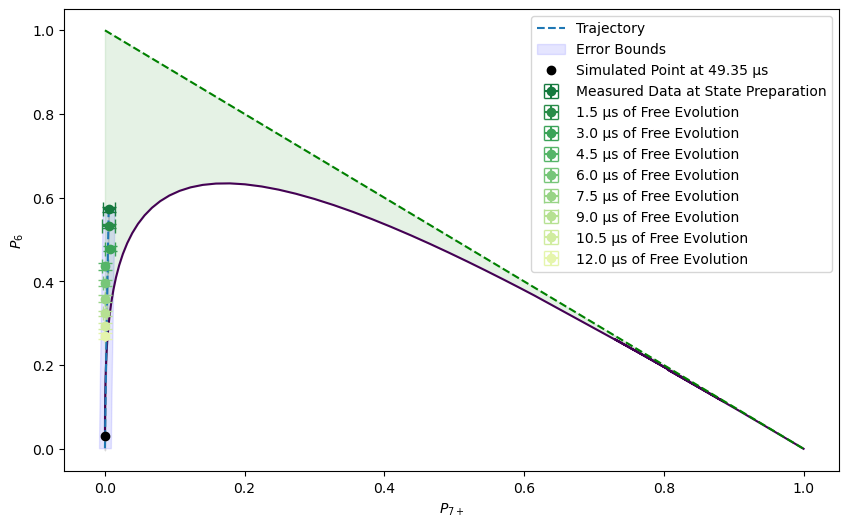

In [18]:
N_dim = 10
T1 = 100
T2 = 60
a = qt.destroy(N_dim)

# Given population
populations = [0.0773647061, 0.0721046944, 0.0549924925, 0.0321446414, 0.0432227302, 0.1429299362, 0.5719346755, 0.0053061237]
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, N_dim - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Relaxation
c_ops = [np.sqrt(1/T1) * a]

# Hamiltonian
H = a.dag() * a * 0

# Time array (in microseconds)
times = np.linspace(0, 100, 1000)

# Create interpolation functions for the curve
interp_curve_y = interp1d(curve_x, curve_y, kind='cubic')

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)

# Extract the populations of Fock states 6 and 7+ over time
populations_6 = np.array([qt.expect(qt.fock_dm(N_dim, 6), state) for state in result.states])
populations_7_plus = np.array([1 - sum(qt.expect(qt.fock_dm(N_dim, i), state) for i in range(7)) for state in result.states])

# Calculate the standard deviation boundaries for the trajectory
populations_6_upper = populations_6 + P_6_std
populations_6_lower = populations_6 - P_6_std
populations_7_plus_upper = populations_7_plus + P_7_plus_std
populations_7_plus_lower = populations_7_plus - P_7_plus_std

cmap = plt.get_cmap('YlGn')
colors = cmap(np.linspace(0.2, 0.8, 9))  # Adjusted the range to make colors darker and greener
plt.figure(figsize=(10, 6))
plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
plt.errorbar(P_7_plus, P_6, xerr=P_7_plus_std, yerr=P_6_std, fmt='o', color=colors[8], capsize=5, label='Measured Data at State Preparation')
plt.errorbar(0.0053113625, 0.5315696748, xerr=0.0093721043, yerr=0.0049060243, fmt='o', color=colors[7], capsize=5, label='1.5 μs of Free Evolution')
plt.errorbar(0.0072722234, 0.4775686644, xerr=0.0076743524, yerr=0.0058821498, fmt='o', color=colors[6], capsize=5, label='3.0 μs of Free Evolution')
plt.errorbar(0, 0.4358417527, xerr=0.0043603789, yerr=0.0076824399, fmt='o', color=colors[5], capsize=5, label='4.5 μs of Free Evolution')
plt.errorbar(0, 0.3952841405, xerr=0.0022082506, yerr=0.0071899226, fmt='o', color=colors[4], capsize=5, label='6.0 μs of Free Evolution')
plt.errorbar(0, 0.3586237667, xerr=0.0003979581, yerr=0.0081761777, fmt='o', color=colors[3], capsize=5, label='7.5 μs of Free Evolution')
plt.errorbar(0, 0.3242269297, xerr=0.0021604912, yerr=0.0057463788, fmt='o', color=colors[2], capsize=5, label='9.0 μs of Free Evolution')
plt.errorbar(0, 0.2931612745, xerr=0, yerr=0.0073858588, fmt='o', color=colors[1], capsize=5, label='10.5 μs of Free Evolution')
plt.errorbar(0, 0.2700884127, xerr=0, yerr=0.0067270851, fmt='o', color=colors[0], capsize=5, label='12.0 μs of Free Evolution')

# Plotting the trajectory with error bounds
plt.plot(populations_7_plus, populations_6, '--', label='Trajectory')
plt.fill_betweenx(populations_6, populations_7_plus_lower, populations_7_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
plt.fill_between(populations_7_plus, populations_6_lower, populations_6_upper, color='gray', alpha=0.3)

# Find the closest point on the trajectory to the curve
min_distance = float('inf')
closest_P6 = None
closest_P7 = None
closest_time = None
for t, p6, p7 in zip(times, populations_6, populations_7_plus):
    distances = distance.cdist([(p7, p6)], list(zip(curve_x, curve_y)))
    min_dist_idx = np.argmin(distances)
    if distances[0, min_dist_idx] < min_distance:
        min_distance = distances[0, min_dist_idx]
        closest_P6 = p6
        closest_P7 = p7
        closest_time = t

plt.plot(closest_P7, closest_P6, 'ko', label=f'Simulated Point at {closest_time:.2f} µs')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{7+}$')
plt.ylabel(r'$P_{6}$')
plt.legend()
plt.title("")
plt.show()

### Trajectory Which Finds the First Interaction

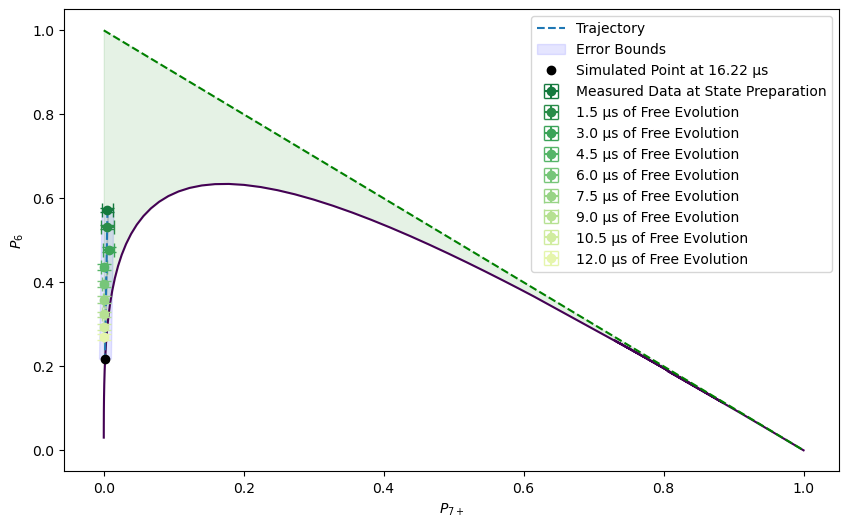

In [19]:
# Find the first intersection of the trajectory with the interpolated curve
first_intersection_time = None
first_intersection_P6 = None
first_intersection_P7_plus = None
first_intersection_state = None

for t, p6, p7_plus, state in zip(times, populations_6, populations_7_plus, result.states):
    curve_y_at_p7_plus = interp_curve_y(p7_plus)
    if np.isclose(p6, curve_y_at_p7_plus, atol=0.01):
        first_intersection_time = t
        first_intersection_P6 = p6
        first_intersection_P7_plus = p7_plus
        first_intersection_state = state
        break

if first_intersection_time is not None:
    # Simulate the intermediate points for the trajectory
    trajectory_times = np.linspace(0, first_intersection_time, 500)
    trajectory_result = qt.mesolve(H, initial_state, trajectory_times, c_ops)
    trajectory_populations_6 = np.array([qt.expect(qt.fock_dm(N_dim, 6), state) for state in trajectory_result.states])
    trajectory_populations_7_plus = np.array([1 - sum(qt.expect(qt.fock_dm(N_dim, i), state) for i in range(7)) for state in trajectory_result.states])

    # Calculate the standard deviation boundaries for the trajectory
    trajectory_populations_6_upper = trajectory_populations_6 + P_6_std
    trajectory_populations_6_lower = trajectory_populations_6 - P_6_std
    trajectory_populations_7_plus_upper = trajectory_populations_7_plus + P_7_plus_std
    trajectory_populations_7_plus_lower = trajectory_populations_7_plus - P_7_plus_std

    # Find the highest point on the interpolated curve
    x_max = curve_x[np.argmax(curve_y)]
    curve_x = np.array(curve_x)

    cmap = plt.get_cmap('YlGn')
    colors = cmap(np.linspace(0.2, 0.8, 9))
    plt.figure(figsize=(10, 6))
    plt.plot(curve_x, curve_y, linestyle='-', color='#440154FF')
    plt.errorbar(P_7_plus, P_6, xerr=P_7_plus_std, yerr=P_6_std, fmt='o', color=colors[8], capsize=5, label='Measured Data at State Preparation')
    plt.errorbar(0.0053113625, 0.5315696748, xerr=0.0093721043, yerr=0.0049060243, fmt='o', color=colors[7], capsize=5, label='1.5 μs of Free Evolution')
    plt.errorbar(0.0072722234, 0.4775686644, xerr=0.0076743524, yerr=0.0058821498, fmt='o', color=colors[6], capsize=5, label='3.0 μs of Free Evolution')
    plt.errorbar(0, 0.4358417527, xerr=0.0043603789, yerr=0.0076824399, fmt='o', color=colors[5], capsize=5, label='4.5 μs of Free Evolution')
    plt.errorbar(0, 0.3952841405, xerr=0.0022082506, yerr=0.0071899226, fmt='o', color=colors[4], capsize=5, label='6.0 μs of Free Evolution')
    plt.errorbar(0, 0.3586237667, xerr=0.0003979581, yerr=0.0081761777, fmt='o', color=colors[3], capsize=5, label='7.5 μs of Free Evolution')
    plt.errorbar(0, 0.3242269297, xerr=0.0021604912, yerr=0.0057463788, fmt='o', color=colors[2], capsize=5, label='9.0 μs of Free Evolution')
    plt.errorbar(0, 0.2931612745, xerr=0, yerr=0.0073858588, fmt='o', color=colors[1], capsize=5, label='10.5 μs of Free Evolution')
    plt.errorbar(0, 0.2700884127, xerr=0, yerr=0.0067270851, fmt='o', color=colors[0], capsize=5, label='12.0 μs of Free Evolution')

    # Plotting the trajectory with error bounds
    plt.plot(trajectory_populations_7_plus, trajectory_populations_6, '--', label='Trajectory')
    plt.fill_betweenx(trajectory_populations_6, trajectory_populations_7_plus_lower, trajectory_populations_7_plus_upper, color='blue', alpha=0.1, label='Error Bounds')
    plt.fill_between(trajectory_populations_7_plus, trajectory_populations_6_lower, trajectory_populations_6_upper, color='gray', alpha=0.3)
    plt.plot(first_intersection_P7_plus, first_intersection_P6, 'ko', label=f'Simulated Point at {first_intersection_time:.2f} µs')
    plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
    plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
    plt.xlabel(r'$P_{7+}$')
    plt.ylabel(r'$P_{6}$')
    plt.legend()
    plt.title("")
    plt.show()
else:
    print("No point on the curve was reached within the given time range.")

# Fock 7

### Measured Point

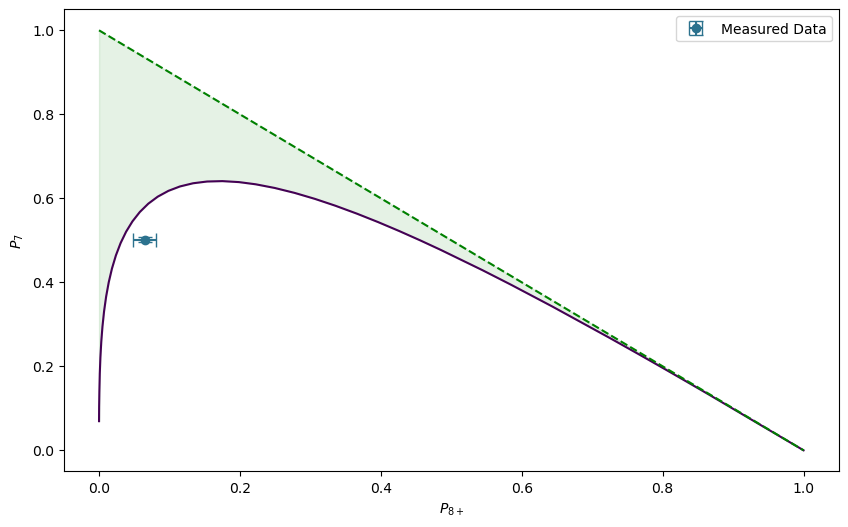

In [20]:
P_7 = 0.5016539883
P_7_std = 0.0055405062
P_8_plus = 0.0645899620
P_8_plus_std = 0.0164371035

data = [
    (5.456931118308361e-6, 0.06939830728674884), (0.00013817146615013876, 0.10387664192426158),
    (0.00047633205897290587, 0.13966847440200747), (0.0010690087835557582, 0.182586337979928),
    (0.0019206164402673087, 0.22057340616877022), (0.0031937936431269964, 0.25892273439912056),
    (0.004849722720511651, 0.2945591051358699), (0.0071325117056676435, 0.3308705619374219),
    (0.0100787092091712, 0.3661866586564214), (0.013764857151364662, 0.4001048800231995),
    (0.018353291100563496, 0.43291608782880553), (0.02393460681657189, 0.46414319847494656),
    (0.030577119823129273, 0.49337972004014535), (0.038377287748499356, 0.5204400142576833),
    (0.047475189966174836, 0.5452683630925331), (0.05791884669069158, 0.5675357688739073),
    (0.06989480820133465, 0.5872433502817171), (0.08336149406884563, 0.604012196607389),
    (0.09847184478585658, 0.6178165095265634), (0.11479495212849533, 0.6282541933010556),
    (0.13346203823440606, 0.6358604343297988), (0.15340778639628116, 0.6400409083393732),
    (0.17505742522971524, 0.6409749589989251), (0.19855297790967652, 0.6386364876863471),
    (0.22238900342388956, 0.6334007079129058), (0.24930692606240779, 0.6246925248959099),
    (0.27755478278448154, 0.6129459490019308), (0.30633707382444075, 0.5987181836253427),
    (0.33528013516383015, 0.5824972673893253), (0.366052048545244, 0.5634796632448739),
    (0.3961273040988851, 0.5433962992782018), (0.4262269235174627, 0.5220207930086432),
    (0.45588436627741824, 0.4998789668380866), (0.48508041295386495, 0.47716418956352474),
    (0.544342372022575, 0.4288141494713406), (0.584920300325009, 0.3941413203085434),
    (0.6433142246845037, 0.34248342985938585), (0.725168537061484, 0.26727913121704894),
    (0.7650144822998574, 0.2297510797282019), (0.7843280341159402, 0.21136957761908626),
    (0.8056178449121606, 0.19096956674801982), (0.8263752852239018, 0.17093972558362547),
    (0.8468568955839334, 0.1510561655213476), (0.8633622369743791, 0.13497443974178458),
    (1, 0)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_8_plus, P_7, xerr=P_8_plus_std, yerr=P_7_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{8+}$')
plt.ylabel(r'$P_{7}$')
plt.title("")
plt.legend()
plt.show()

# Fock 8

### Measured Point

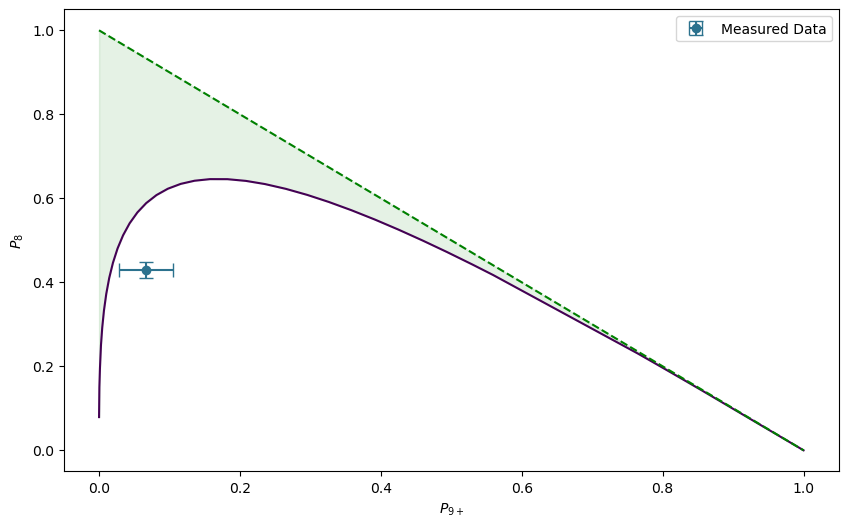

In [21]:
P_8 = 0.4287267901
P_8_std = 0.0188820873
P_9_plus = 0.0662574370
P_9_plus_std = 0.0383700281

data = [
    (0.000035700037402386364, 0.07908546642550597), (0.0002598424188865467, 0.11472375089537053),
    (0.0004936268298791902, 0.1504464121904728), (0.0013230713531429128, 0.19607785218646545),
    (0.002767244963215565, 0.25084954008731275), (0.004547264162586773, 0.2924938654663283),
    (0.007006467970951835, 0.3332012441704823), (0.0102734749427571, 0.3726734554907191),
    (0.01449051884632968, 0.41065847103501063), (0.01975974740308395, 0.44659666654830904),
    (0.026296130317317146, 0.480657822244108), (0.03412158489478245, 0.5119746553958664),
    (0.043425799307358015, 0.5405864722360274), (0.05443141576089705, 0.5664226240123619),
    (0.0669415109103777, 0.5886069500295338), (0.08150074349107139, 0.6077049020976455),
    (0.09765688904002634, 0.6228517027172172), (0.1159532240357869, 0.6344102257042986),
    (0.13552978172944086, 0.641878965891245), (0.15742386870281977, 0.6456968525644489),
    (0.18227546771888226, 0.645588459341108), (0.20856880723089932, 0.64149052306851),
    (0.23554583404014884, 0.6339434024886685), (0.26516521341763144, 0.6225518140047115),
    (0.29559944499893653, 0.6081124858403374), (0.3259411340478907, 0.5914570572550997),
    (0.35832924728282656, 0.5716189958208622), (0.3915461591696682, 0.5494280452115278),
    (0.42505234707309025, 0.5254475275804201), (0.45972572335663253, 0.49920050861492404),
    (0.49375347237333467, 0.47223153420534747), (0.5304265595242958, 0.44201684121038287),
    (0.559411234410156, 0.4173609057844264), (0.7642831896451434, 0.2308585816063853),
    (0.7859795239706544, 0.21012625981740915), (0.8105353567637961, 0.18647436332735312),
    (0.8332807777968649, 0.1644164555825486), (0.8536284128397276, 0.14457014197489124),
    (1, 0)
]

x, y = zip(*data)
curve_x, curve_y = zip(*data)
curve_x = np.array(curve_x)
curve_y = np.array(curve_y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='#440154FF')
plt.errorbar(P_9_plus, P_8, xerr=P_9_plus_std, yerr=P_8_std, fmt='o', color='#2C728EFF', capsize=5, label='Measured Data')
plt.plot([0, 1], [1, 0], color='green', linestyle='--', label='')
plt.fill_between(curve_x, curve_y, 1 - curve_x, where=(1 - curve_x > curve_y), color='green', alpha=0.1)
plt.xlabel(r'$P_{9+}$')
plt.ylabel(r'$P_{8}$')
plt.title("")
plt.legend()
plt.show()

# Simulate Losses

### Coherent State Simulation

In [22]:
dim_phonon = 15 # Hilbert space dimension
alpha = 2 # Phase space amplitude of coherent state
p = qt.destroy(dim_phonon)
pd = p.dag() 
T1p = 1 / 100 # Reciprocal of phonon T1 in μs

initial_state = qt.coherent(dim_phonon, alpha)
time = 96.70 # Simulated time to reach the QNG threshold in μs

In [23]:
def loss(initial_state, time):
    H = p * pd * 0
    times = np.linspace(0, time, 1000)
    n_p = qt.num(dim_phonon)
    initial_phonons = qt.expect(n_p, initial_state)
    result = qt.mesolve(H, initial_state, times, [np.sqrt(T1p) * p], e_ops=[n_p])
    final_phonons = result.expect[0][-1]
    return 10 * math.log10(initial_phonons / final_phonons)

print(loss(initial_state, time))

4.1996275684295306


### Variable Beamsplitter Simulation

In [24]:
time = 16.22 # Simulated time to reach the QNG threshold in μs
target_fock = 6 # Target fock integer
populations = [0.077, 0.072, 0.055, 0.032, 0.043, 0.143, 0.572, 0.005] # Population distribution of the measured data
num_fock_states = len(populations)

# Create the initial state with the given population
initial_state_small = sum(np.sqrt(pop) * qt.basis(num_fock_states, n) for n, pop in enumerate(populations))
initial_state = qt.Qobj(np.pad(initial_state_small.full(), [(0, dim_phonon - num_fock_states), (0, 0)]))
initial_state = initial_state.unit()

# Hamiltonian
c_ops = [np.sqrt(T1p) * p]
H = p * pd * 0
times = np.linspace(0, time, 1000)

# Solve the master equation
result = qt.mesolve(H, initial_state, times, c_ops)
final_state = result.states[-1]
populations_final = [qt.expect(qt.basis(dim_phonon, n) * qt.basis(dim_phonon, n).dag(), final_state) for n in range(len(populations))]
print("Final population distribution:")
for n, pop in enumerate(populations_final):
    print(f"State |{n}>: {pop:.6f}")

def beamsplitter_operator(t, dim):
    B = np.zeros((dim, dim), dtype=complex)
    for n in range(dim):
        if n < dim - 1:
            B[n, n] = t
            B[n, n + 1] = np.sqrt(1 - t**2)
            B[n + 1, n] = -np.sqrt(1 - t**2)
            B[n + 1, n + 1] = t
    return qt.Qobj(B)

def population_in_fock(initial_state, t, dim):
    B = beamsplitter_operator(t, dim)
    final_state = B * initial_state
    final_state_1 = final_state.ptrace(0) 
    return qt.expect(qt.basis(dim, target_fock) * qt.basis(dim, target_fock).dag(), final_state_1)

Final population distribution:
State |0>: 0.089249
State |1>: 0.078148
State |2>: 0.060991
State |3>: 0.078947
State |4>: 0.179454
State |5>: 0.293261
State |6>: 0.218341
State |7>: 0.001608


In [25]:
desired_population = populations_final[target_fock]
t_values = np.linspace(0, 1, 1000)
best_t = None
best_population_diff = float('inf')

for t in t_values:
    pop = population_in_fock(initial_state, t, dim_phonon)
    pop_diff = abs(pop - desired_population)
    if pop_diff < best_population_diff:
        best_population_diff = pop_diff
        best_t = t

print(f"Best intensity transmittance: {best_t ** 2}")
print(f"Best amplitude transmittance: {best_t}")
print(f"Resulting population in Fock {target_fock}: {population_in_fock(initial_state, best_t, dim_phonon)}")

Best intensity transmittance: 0.7036505975444914
Best amplitude transmittance: 0.8388388388388388
Resulting population in Fock 6: 0.2183577120452805
